In [19]:
import pandas as pd
import numpy as np
import glob

In [20]:
list_excel = glob.glob('../data/*.xlsx')
data = []

for file in list_excel:
    dfi = pd.read_excel(file, index_col=0)
    comuna = file.split('_')[-1].split('.')[0]
    dfi['comuna'] = comuna
    data.append(dfi)

data = pd.concat(data)

<Axes: xlabel='comuna'>

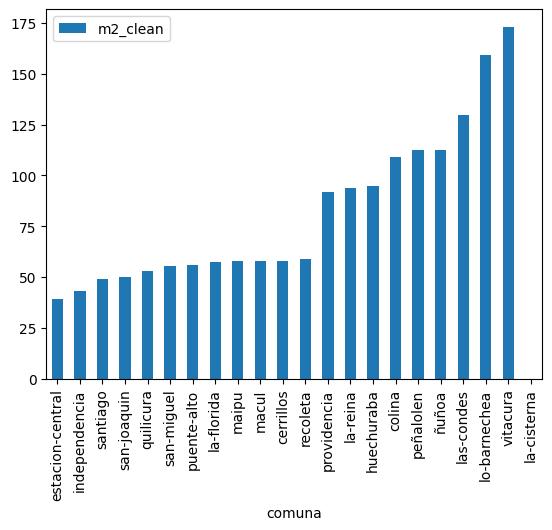

In [27]:
data_filter = data.loc[data.proyecto==False]
data_filter.groupby('comuna').agg({'m2_clean': 'mean'}).sort_values('m2_clean').plot(kind='bar')